# Showcase the EarthDaily Simulated dataset

This notebook illustrates how to use the EarthDaily Simulated dataset to generate a field level datacube that will use to generate a vegetation index evolution animation highlighting new capabilities enabled by daily imagery.

For this example the data cube has been generated using https://github.com/GEOSYS/earthdaily-data-processor with the following parameters:
    - Geomtry: "POLYGON ((-96.444476707042 41.18311650256777, -96.4347884854818 41.18295356510254, -96.43489673376754 41.176069086814266, -96.4445308311847 41.176028348103074, -96.44436845875661 41.17879852277147, -96.444476707042 41.18311650256777))"
    - collection: earthdaily-simulated-cloudless-l2a-cog-edagro
    - Dates: 2019-05-01 to 2019-05-31
    - Bands: red, green, blue

In [2]:
import sys
import os
sys.path.append(os.path.join('..','src'))
from geosyspy.utils.constants import *
from dotenv import load_dotenv
load_dotenv()
import xarray as xr
from geogif import dgif
from earthdaily_data_processor.utils import open_cube_azure

## 1️⃣ Open EarthDaily simulated dataset

- Load Datacube from Azure Cloud Storage

In [4]:
image = '2019-05-01_2019-05-31_EDdataset_earthdaily-simulated-cloudless-l2a-cog-edagro_datacube.zarr'
cube = open_cube_azure(image)

 ## 2️⃣ Plot one year of data

In [5]:
datacube = cube[["red", "green", "blue"]].to_array()/10000
datacube = datacube.rename({'variable':'band'})
datacube = datacube.transpose('time','band','y','x')

In [6]:
result_animated = dgif(datacube,date_format=None).compute()
scale = 20
result_animated.height = int(datacube.shape[3] * scale)
result_animated.width = int(datacube.shape[2] * scale)

c:\Users\vl\.conda\envs\earthdaily-processor\lib\site-packages\geogif\gif.py:190: RuntimeWarning: invalid value encountered in cast
  u8 = (data * 255).astype("uint8")


Animation of the EarthDaily Simulated dataset between May 1st 2019 and May 29st 2020


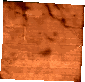

In [7]:
print('Animation of the EarthDaily Simulated dataset between May 1st 2019 and May 29st 2020')
result_animated